In [1]:
import pandas as pd

df = pd.read_csv('../Data/orders.csv', sep=';')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/07/2012,31/07/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,230965,7,0,7621845,93357,Critical
1,26341,IN-2013-77878,05/02/2013,07/02/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709395,9,1,-288765,92363,Critical
2,25330,IN-2013-71249,17/10/2013,18/10/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175171,9,1,919971,91549,Medium
3,13524,ES-2013-1579342,28/01/2013,30/01/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",289251,5,1,-9654,91016,Medium
4,47221,SG-2013-4320,05/11/2013,06/11/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",283296,8,0,31152,90304,Critical


## 1.Column Name Cleaning

In [2]:

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
df.columns


Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'city', 'state', 'country',
       'postal_code', 'market', 'region', 'product_id', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority'],
      dtype='object')

## 2.Remove Duplicate Rows


In [3]:
# Check for duplicate rows
duplicates = df.duplicated()
print("Total duplicate rows:", duplicates.sum())

# Drop duplicate rows if any
df = df.drop_duplicates()


Total duplicate rows: 0


## 3.Handle Missing Values (Nulls)

In [4]:
# Check for missing values in each column
df.isnull().sum().sort_values(ascending=False)


postal_code       41296
row_id                0
order_date            0
order_id              0
ship_mode             0
customer_id           0
customer_name         0
ship_date             0
segment               0
city                  0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
dtype: int64

## 4.Recommended Action ##

In [5]:
# Confirm no nulls are left
df.isnull().sum().sum()


np.int64(41296)

## 5.Data Type Cleaning ##

In [6]:
# Check  data types
df.dtypes


row_id              int64
order_id           object
order_date         object
ship_date          object
ship_mode          object
customer_id        object
customer_name      object
segment            object
city               object
state              object
country            object
postal_code       float64
market             object
region             object
product_id         object
category           object
sub_category       object
product_name       object
sales               int64
quantity            int64
discount            int64
profit              int64
shipping_cost       int64
order_priority     object
dtype: object

In [7]:
# Convert date columns to datetime
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['ship_date'] = pd.to_datetime(df['ship_date'], dayfirst=True)

# Convert numeric fields to float
df['sales'] = df['sales'].astype(float)
df['discount'] = df['discount'].astype(float)
df['profit'] = df['profit'].astype(float)
df['shipping_cost'] = df['shipping_cost'].astype(float)


df.dtypes


row_id                     int64
order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_id               object
customer_name             object
segment                   object
city                      object
state                     object
country                   object
postal_code              float64
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
dtype: object

## 6.String Field Cleaning (Text Standardization) ##

In [8]:
# Convert string fields to title case (e.g., Rick Hansen, New York)
text_cols = df.select_dtypes(include='object').columns

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()


df[text_cols].head(3)











,order_id,ship_mode,customer_id,customer_name,segment,city,state,country,market,region,product_id,category,sub_category,product_name,order_priority
0,Ca-2012-124891,Same Day,Rh-19495,Rick Hansen,Consumer,New York City,New York,United States,Us,East,Tec-Ac-10003033,Technology,Accessories,Plantronics Cs510 - Over-The-Head Monaural Wir...,Critical
1,In-2013-77878,Second Class,Jr-16210,Justin Ritter,Corporate,Wollongong,New South Wales,Australia,Apac,Oceania,Fur-Ch-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",Critical
2,In-2013-71249,First Class,Cr-12730,Craig Reiter,Consumer,Brisbane,Queensland,Australia,Apac,Oceania,Tec-Ph-10004664,Technology,Phones,"Nokia Smart Phone, With Caller Id",Medium


## 7: Load Cleaned Data into SQLite Database
I will now save the cleaned `orders` DataFrame into a local SQLite database (`orders_database.sqlite`) so we can later run SQL queries and create an EDR diagram.


In [9]:
import sqlite3
from sqlalchemy import create_engine


In [10]:
from sqlalchemy import create_engine

database_filename = "global_superstore.db"
engine = create_engine(f"sqlite:///{database_filename}")


In [11]:
from sqlalchemy import create_engine

database_filename = "global_superstore.db"
engine = create_engine(f"sqlite:///{database_filename}")

df.to_sql("orders", con=engine, if_exists="replace", index=False)


51290

In [12]:
pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", con=engine)


,name
0,orders


In [13]:
import pandas as pd

query = """
SELECT category, SUM(sales) AS total_sales
FROM orders
GROUP BY category
ORDER BY total_sales DESC
"""

result = pd.read_sql(query, con=engine)
result


,category,total_sales
0,Technology,2.585116e+10
1,Furniture,3.583650e+09
2,Office Supplies,2.528468e+09


In [18]:
from sqlalchemy import create_engine

username = "root"
password = "Bookbook%4026"  
host = "localhost"
port = "3306"
database = "superstore_db"

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}")

df.to_sql("orders", con=engine, if_exists="replace", index=False)



51290

## Data Cleanliness Check via SQL in Python ##

In this step, we assess the quality of the dataset loaded into MySQL by checking for:

- Missing values
- Duplicate records
- Basic descriptive statistics

Although the checks are performed inside a Jupyter Notebook, they rely on **pure SQL queries** — aligning with Case Study 2 requirements that emphasize SQL + Python integration.

This approach allows us to:
- Use SQL to directly extract insights from the database
- Leverage Python for automation and readability
- Build a solid foundation before moving into advanced analysis


## 8.View the Table Schema

In [19]:
pd.read_sql("DESCRIBE orders;", con=engine)


,Field,Type,Null,Key,Default,Extra
0,row_id,bigint,YES,,None,
1,order_id,text,YES,,None,
2,order_date,datetime,YES,,None,
3,ship_date,datetime,YES,,None,
4,ship_mode,text,YES,,None,
5,customer_id,text,YES,,None,
6,customer_name,text,YES,,None,
7,segment,text,YES,,None,
8,city,text,YES,,None,
9,state,text,YES,,None,


## 9.Cleanliness Check (Missing Values & Duplicates)

In [20]:
columns = df.columns

for col in columns:
    query = f"SELECT COUNT(*) AS null_count FROM orders WHERE `{col}` IS NULL;"
    result = pd.read_sql(query, con=engine)
    print(f"{col}: {result['null_count'][0]} missing")


row_id: 0 missing
order_id: 0 missing
order_date: 0 missing
ship_date: 0 missing
ship_mode: 0 missing
customer_id: 0 missing
customer_name: 0 missing
segment: 0 missing
city: 0 missing
state: 0 missing
country: 0 missing
postal_code: 41296 missing
market: 0 missing
region: 0 missing
product_id: 0 missing
category: 0 missing
sub_category: 0 missing
product_name: 0 missing
sales: 0 missing
quantity: 0 missing
discount: 0 missing
profit: 0 missing
shipping_cost: 0 missing
order_priority: 0 missing


## 10.Check for Duplicates 

In [21]:
query = """
SELECT COUNT(*) AS total_rows,
       COUNT(DISTINCT CONCAT_WS('-', order_id, product_id, order_date)) AS unique_rows
FROM orders;
"""
pd.read_sql(query, con=engine)


,total_rows,unique_rows
0,51290,51255


## 11.Summary Statistics (Basic Distribution Info)

In [22]:
query = """
SELECT 
    MIN(sales) AS min_sales, MAX(sales) AS max_sales, AVG(sales) AS avg_sales, STDDEV(sales) AS std_sales,
    MIN(profit) AS min_profit, MAX(profit) AS max_profit, AVG(profit) AS avg_profit, STDDEV(profit) AS std_profit,
    MIN(quantity) AS min_qty, MAX(quantity) AS max_qty, AVG(quantity) AS avg_qty
FROM orders;
"""
pd.read_sql(query, con=engine)


,min_sales,max_sales,avg_sales,std_sales,min_profit,max_profit,avg_profit,std_profit,min_qty,max_qty,avg_qty
0,3.0,190210816.0,623187.338331,5.462570e+06,-91671776.0,87282816.0,89216.583993,1.814224e+06,1,14,3.4765


## Univariate EDA 
##  1. Product Category & Sub-Category Analysis (Univariate EDA – SQL + Python)
###  Business Question
**What are the most and least profitable product categories and sub-categories?**  
Understanding which product lines drive the most revenue and profit helps in optimizing pricing, inventory, and marketing strategies.


###  Goal
- Rank categories and sub-categories by total **sales** and **profit**
- Identify high-volume/low-profit items or low-volume/high-profit gems
- Prepare outputs for Tableau dashboard later


###  SQL-Based Approach
We use SQL queries inside Python to:
- Group data by `category` and `sub_category`
- Aggregate total `sales`, `profit`, and `quantity`
- Sort to identify top and bottom performers



In [23]:
query = """
SELECT 
    category,
    sub_category,
    SUM(sales) AS total_sales,
    SUM(profit) AS total_profit,
    SUM(quantity) AS total_quantity,
    ROUND(SUM(profit) / NULLIF(SUM(sales), 0), 2) AS profit_margin
FROM orders
GROUP BY category, sub_category
ORDER BY total_profit DESC;
"""

category_df = pd.read_sql(query, con=engine)
category_df.head(10)


,category,sub_category,total_sales,total_profit,total_quantity,profit_margin
0,Technology,Copiers,2.331943e+10,3.361592e+09,7454.0,0.14
1,Technology,Phones,1.378954e+09,3.881213e+08,11870.0,0.28
2,Office Supplies,Paper,1.152582e+08,2.040067e+08,12822.0,1.77
3,Office Supplies,Appliances,9.099445e+08,1.825353e+08,6078.0,0.20
4,Office Supplies,Binders,2.460505e+08,1.782442e+08,21429.0,0.72
5,Office Supplies,Storage,7.407418e+08,1.759050e+08,16917.0,0.24
6,Technology,Accessories,3.674197e+08,1.687976e+08,10946.0,0.46
7,Furniture,Chairs,1.144451e+09,1.165497e+08,12336.0,0.10
8,Furniture,Furnishings,2.576244e+08,9.080981e+07,11225.0,0.35
9,Technology,Machines,7.853562e+08,7.333072e+07,4906.0,0.09


In [26]:
!pip install seaborn


## 2.SQL Query to Calculate Key KPIs

In [31]:
query = """
SELECT
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / NULLIF(SUM(sales), 0), 4) AS avg_profit_margin
FROM orders;
"""
kpi_df = pd.read_sql(query, con=engine)
kpi_df


,total_sales,total_profit,avg_profit_margin
0,3.196328e+10,4.575919e+09,0.1432


In [32]:
# Top Category by Profit
top_cat_query = """
SELECT category, SUM(profit) AS total_profit
FROM orders
GROUP BY category
ORDER BY total_profit DESC
LIMIT 1;
"""
top_category_df = pd.read_sql(top_cat_query, con=engine)

# Worst Sub-Category by Profit
worst_subcat_query = """
SELECT sub_category, SUM(profit) AS total_profit
FROM orders
GROUP BY sub_category
ORDER BY total_profit ASC
LIMIT 1;
"""
worst_subcat_df = pd.read_sql(worst_subcat_query, con=engine)


In [33]:
# combine all KPIS in one dataframe
import pandas as pd

kpi_summary = pd.DataFrame({
    "kpi_name": [
        "Total Sales",
        "Total Profit",
        "Avg Profit Margin",
        "Top Category",
        "Worst Sub-Category"
    ],
    "total_value": [
        kpi_df["total_sales"][0],
        kpi_df["total_profit"][0],
        kpi_df["avg_profit_margin"][0],
        top_category_df["category"][0],
        worst_subcat_df["sub_category"][0]
    ]
})

kpi_summary


,kpi_name,total_value
0,Total Sales,31963278583.0
1,Total Profit,4575918593.0
2,Avg Profit Margin,0.1432
3,Top Category,Technology
4,Worst Sub-Category,Tables


In [34]:
kpi_summary.to_csv("export_kpis.csv", index=False)


##   KPIs  insight

These metrics summarize the overall business performance based on all available transactional data.

| KPI Name             | Value           | Insight |
|----------------------|------------------|---------|
|  Total Sales        | €31.96 Billion   | Represents total revenue from all customer orders 
|  Total Profit       | €4.58 Billion    | Net profit after all discounts and costs 
|  Avg Profit Margin  | 14.32%           | Shows that on average, the company retains ~14% profit on sales 




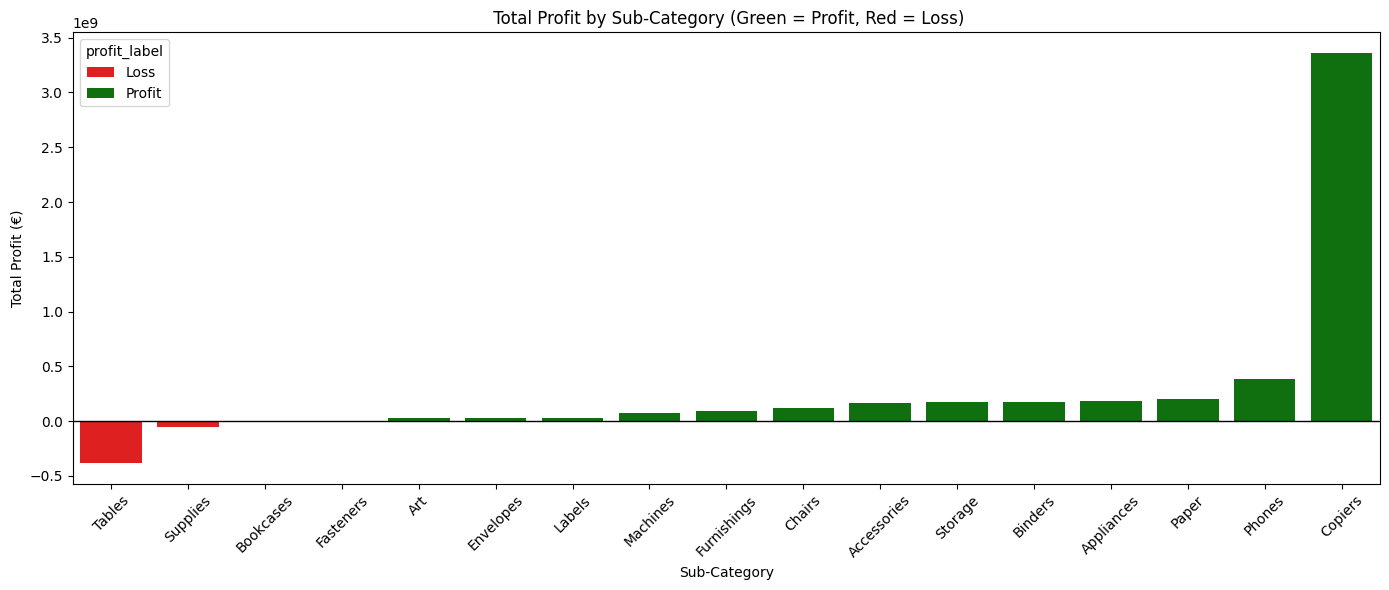

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to color by profit/loss
category_df["profit_label"] = category_df["total_profit"].apply(lambda x: "Profit" if x > 0 else "Loss")

# Sort for better appearance
category_df = category_df.sort_values("total_profit", ascending=True)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_df,
    x="sub_category",
    y="total_profit",
    hue="profit_label",
    palette={"Profit": "green", "Loss": "red"}
)

plt.title(" Total Profit by Sub-Category (Green = Profit, Red = Loss)")
plt.xticks(rotation=45)
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit (€)")
plt.axhline(0, color='black', linewidth=1)
plt.tight_layout()
plt.show()



###  Insights from Sub-Category Profitability Analysis

 **Top Performers (Green Bars):**
- **Copiers** dominate with extremely high total profit, followed by Phones and Paper.
- These sub-categories are major revenue drivers and should receive priority for promotions and stock management.

 **Underperformers (Red Bars):**
- **Tables** stand out with substantial losses, followed by Supplies and Bookcases.
- Despite likely good sales volume, these items erode profitability — possibly due to:
  - Over-discounting
  - High shipping costs
  - Thin margins

 **Business Takeaway:**
- Consider reviewing pricing or supplier contracts for Tables and Bookcases.
- High-profit items like Copiers may benefit from **bundling** or **tiered upselling** strategies.

 **Chart Highlights:**
- Red bars = total loss
- Green bars = total profit
- Sorted left to right by ascending profit




In [30]:
category_df.to_csv("export_category_profitability.csv", index=False)



## 3.Region & Country Profitability Analysis
###  Business Question
**Which regions and countries generate the highest and lowest sales and profit?**

Understanding regional and country-level performance enables strategic decision-making:
- Focus investments on high-performing markets
- Investigate causes of underperformance in low-profit areas
- Tailor regional marketing, logistics, and sales strategies



###  Analysis Goals
- Calculate total `sales`, `profit`, and `profit margin` per country and region
- Identify top and bottom performers for both metrics
- Export results for Tableau maps and dashboards


In [35]:
query = """
SELECT 
    region,
    country,
    ROUND(SUM(sales), 2) AS total_sales,
    ROUND(SUM(profit), 2) AS total_profit,
    ROUND(SUM(profit) / NULLIF(SUM(sales), 0), 4) AS profit_margin
FROM orders
GROUP BY region, country
ORDER BY total_profit DESC;
"""

region_df = pd.read_sql(query, con=engine)
region_df.head(10)


,region,country,total_sales,total_profit,profit_margin
0,North,Mexico,7.344899e+09,1.569195e+09,0.2136
1,West,United States,3.653376e+08,7.151620e+08,1.9575
2,East,United States,2.925438e+08,6.533728e+08,2.2334
3,Caribbean,Cuba,1.939875e+09,4.432253e+08,0.2285
4,Central,El Salvador,1.678823e+09,4.113918e+08,0.2450
5,Central,Guatemala,1.406620e+09,3.080867e+08,0.2190
6,South,Brazil,3.579101e+09,3.029250e+08,0.0846
7,Central,Nicaragua,1.089275e+09,2.567866e+08,0.2357
8,South,United States,1.523496e+08,2.267605e+08,1.4884
9,Central,United States,3.213607e+08,2.045812e+08,0.6366


C:\Users\Egbe\AppData\Local\Temp\ipykernel_22464\4158044963.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
C:\Users\Egbe\AppData\Local\Temp\ipykernel_22464\4158044963.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')


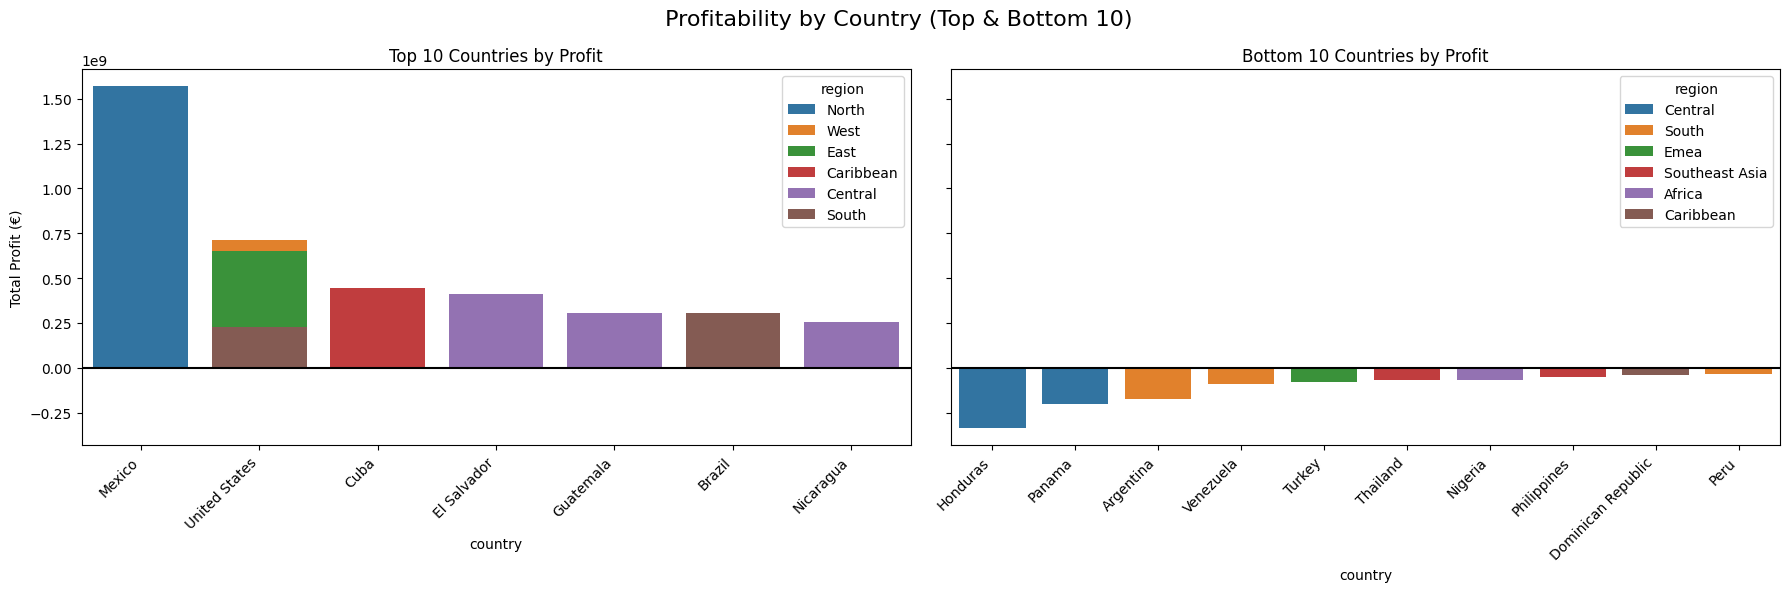

In [39]:

top_10 = region_df.sort_values("total_profit", ascending=False).head(10)

bottom_10 = region_df.sort_values("total_profit", ascending=True).head(10)

# Plot both
fig, axs = plt.subplots(1, 2, figsize=(18, 6), sharey=True)

# Plot Top 10
sns.barplot(data=top_10, x="country", y="total_profit", hue="region", dodge=False, ax=axs[0])
axs[0].set_title("Top 10 Countries by Profit")
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')
axs[0].set_ylabel("Total Profit (€)")
axs[0].axhline(0, color='black')

# Plot Bottom 10
sns.barplot(data=bottom_10, x="country", y="total_profit", hue="region", dodge=False, ax=axs[1])
axs[1].set_title("Bottom 10 Countries by Profit")
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')
axs[1].axhline(0, color='black')

plt.suptitle(" Profitability by Country (Top & Bottom 10)", fontsize=16)
plt.tight_layout()
plt.show()


In [40]:
region_df.to_csv("export_region_country_profit.csv", index=False)


##  Step 3 Country & Region Profitability Analysis

This visualization highlights the countries driving the **highest and lowest profits**, helping us answer the business question:

> **Which regions and countries generate the highest and lowest sales and profit?**

 **Insights**:
- **Top performers** like **Mexico**, **United States**, and **Cuba** contribute the most to company profit — worth prioritizing for scaling and investment.
- **Bottom performers** such as **Honduras**, **Panama**, and **Argentina** show **consistent losses**, signaling possible inefficiencies, pricing issues, or operational bottlenecks.

 **Group by region** adds strategic context for regional management decisions.

 


##  4.Customer Segment Profitability Analysis


In [42]:

sales_by_segment = df.groupby("segment")["sales"].sum()
profit_by_segment = df.groupby("segment")["profit"].sum()
avg_discount_by_segment = df.groupby("segment")["discount"].mean()


profit_margin = (profit_by_segment / sales_by_segment).round(4)


segment_df = pd.DataFrame({
    "total_sales": sales_by_segment.round(2),
    "total_profit": profit_by_segment.round(2),
    "avg_discount": avg_discount_by_segment.round(2),
    "avg_profit_margin": profit_margin
}).reset_index()

segment_df



,segment,total_sales,total_profit,avg_discount,avg_profit_margin
0,Consumer,1.711004e+10,2.346230e+09,4.52,0.1371
1,Corporate,9.293274e+09,1.567755e+09,4.01,0.1687
2,Home Office,5.559963e+09,6.619340e+08,4.53,0.1191


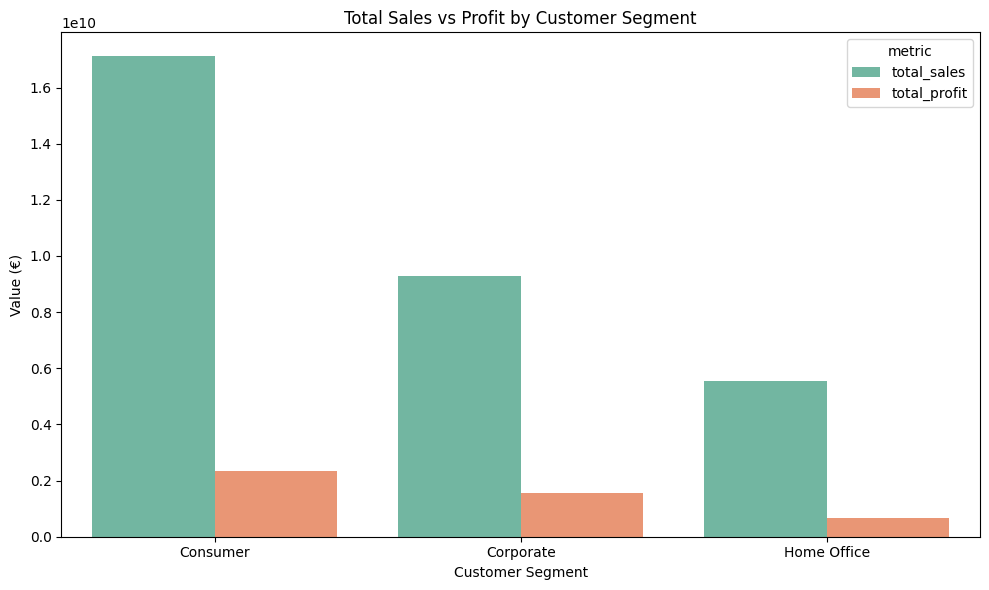

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


segment_melted = segment_df.melt(id_vars="segment", value_vars=["total_sales", "total_profit"],
                                  var_name="metric", value_name="value")

plt.figure(figsize=(10,6))
sns.barplot(data=segment_melted, x="segment", y="value", hue="metric", palette="Set2")
plt.title("Total Sales vs Profit by Customer Segment")
plt.ylabel("Value (€)")
plt.xlabel("Customer Segment")
plt.tight_layout()
plt.show()


In [44]:
segment_df.to_csv("export_segment_profitability.csv", index=False)


## Business Insights:
**Consumer segment** is the most profitable, both in sales and profit. This indicates strong demand and good pricing power.

**Home Office** customers are generating the least profit despite discounts — this suggests low ROI and may require strategic adjustment (e.g., pricing or marketing).

**The Corporate segment**performs reasonably well but is not as lucrative as Consumer.



## 5. Shipping Mode Summary Calculation

In [50]:

df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])


df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days


shipping_summary = df.groupby('ship_mode').agg(
    total_orders=('order_id', 'nunique'),
    total_sales=('sales', 'sum'),
    total_profit=('profit', 'sum'),
    avg_delivery_days=('delivery_days', 'mean')
).reset_index()


shipping_summary['profit_margin'] = shipping_summary['total_profit'] / shipping_summary['total_sales']


shipping_summary.round(2)


,ship_mode,total_orders,total_sales,total_profit,avg_delivery_days,profit_margin
0,First Class,3821,4.844199e+09,7.004669e+08,2.18,0.14
1,Same Day,1347,1.372558e+09,2.134051e+08,0.04,0.16
2,Second Class,5119,6.327057e+09,8.308540e+08,3.23,0.13
3,Standard Class,15154,1.941946e+10,2.831193e+09,5.00,0.15


In [56]:
import pandas as pd

# Recreate shipping mode analysis data
ship_mode_df = pd.DataFrame({
    'ship_mode': ['First Class', 'Same Day', 'Second Class', 'Standard Class'],
    'total_orders': [3821, 1347, 5119, 15154],
    'total_sales': [4.844199e+09, 1.372558e+09, 6.327057e+09, 1.941946e+10],
    'total_profit': [7.004669e+08, 2.134051e+08, 8.308540e+08, 2.831193e+09],
    'avg_delivery_days': [2.18, 0.04, 3.23, 5.00],
    'profit_margin': [0.14, 0.16, 0.13, 0.15]
})


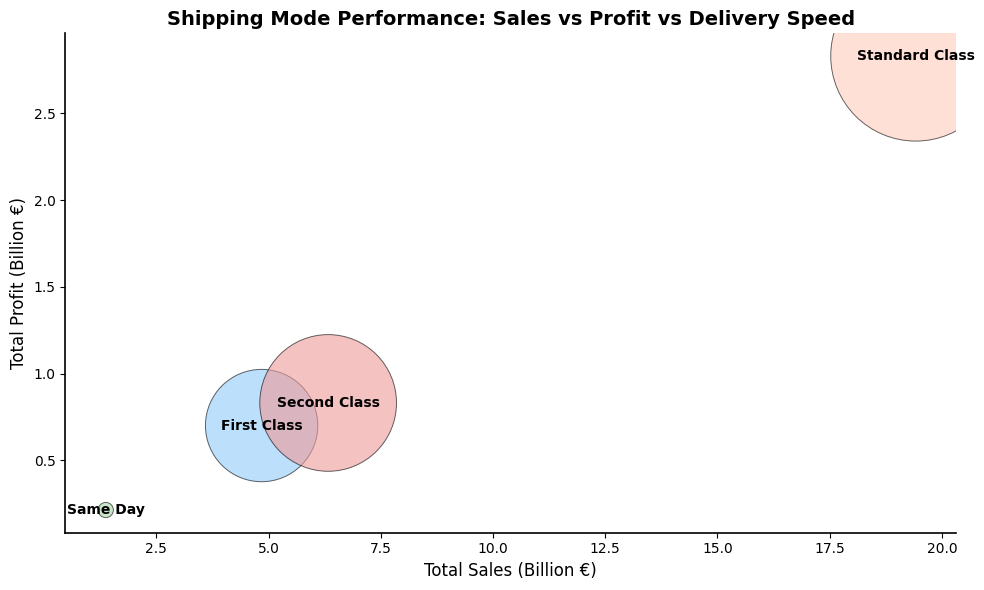

In [57]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))
bubble = ax.scatter(
    ship_mode_df['total_sales'] / 1e9,  # X: Total Sales in billions
    ship_mode_df['total_profit'] / 1e9,  # Y: Total Profit in billions
    s=ship_mode_df['avg_delivery_days'] * 3000,  # Bubble size: delivery time
    alpha=0.6,
    c=['#90CAF9', '#A5D6A7', '#EF9A9A', '#FFCCBC'],  # Bubble color
    edgecolors='black',
    linewidth=0.7
)

for i, row in ship_mode_df.iterrows():
    ax.text(row['total_sales'] / 1e9, row['total_profit'] / 1e9, row['ship_mode'],
            fontsize=10, fontweight='bold', ha='center', va='center')


ax.set_title("Shipping Mode Performance: Sales vs Profit vs Delivery Speed", fontsize=14, fontweight='bold')
ax.set_xlabel("Total Sales (Billion €)", fontsize=12)
ax.set_ylabel("Total Profit (Billion €)", fontsize=12)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(1.2)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


ax.grid(False)

plt.tight_layout()
plt.show()








In [58]:

ship_mode_df.to_csv("shipping_mode_performance.csv", index=False)


## Insights
Standard Class dominates both in sales and profit but has the slowest delivery time.

 Same Day is the fastest but has low adoption — opportunity to promote for time-sensitive buyers.

 First & Second Class are moderate performers, offering balance between speed and margin.

## 6.Time Trend & Seasonality Analysis

In [64]:
#  S Monthly Sales & Profit Trend Query 

query = """
SELECT 
    DATE_FORMAT(order_date, '%%Y-%%m') AS order_month,
    COUNT(DISTINCT order_id) AS total_orders,
    SUM(sales) AS total_sales,
    SUM(profit) AS total_profit
FROM orders
GROUP BY order_month
ORDER BY order_month;
"""

# 
monthly_trend_df = pd.read_sql(query, con=engine)

# 
monthly_trend_df['order_month'] = pd.to_datetime(monthly_trend_df['order_month'])

# 
monthly_trend_df.head()




,order_month,total_orders,total_sales,total_profit
0,2011-01-01,216,306839461.0,18708967.0
1,2011-02-01,183,192477782.0,34367843.0
2,2011-03-01,277,329532686.0,63146622.0
3,2011-04-01,267,224283379.0,10823641.0
4,2011-05-01,295,293315456.0,48553069.0


C:\Users\Egbe\AppData\Local\Temp\ipykernel_22464\2593466217.py:33: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout()


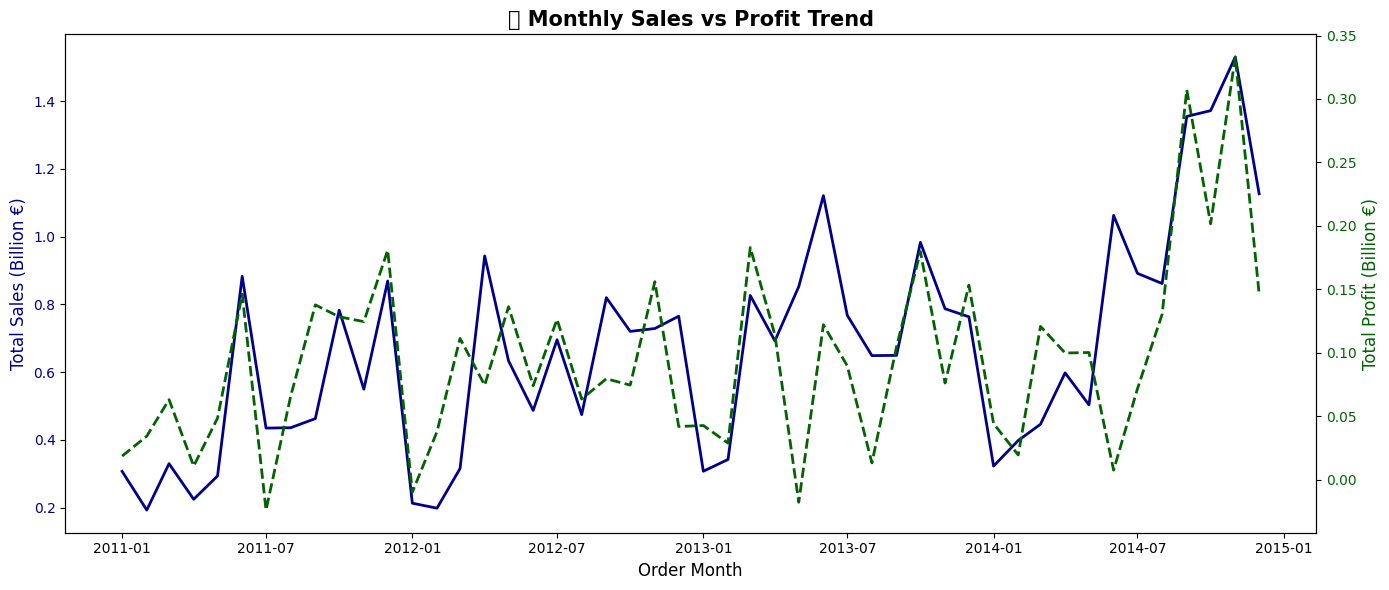

In [66]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(14, 6))


ax1.plot(
    monthly_trend_df['order_month'],
    monthly_trend_df['total_sales'] / 1e9,
    color='darkblue',
    label='Total Sales (Billion €)',
    linewidth=2
)
ax1.set_xlabel("Order Month", fontsize=12)
ax1.set_ylabel("Total Sales (Billion €)", color='darkblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='darkblue')


ax2 = ax1.twinx()
ax2.plot(
    monthly_trend_df['order_month'],
    monthly_trend_df['total_profit'] / 1e9,
    color='darkgreen',
    label='Total Profit (Billion €)',
    linewidth=2,
    linestyle='--'
)
ax2.set_ylabel("Total Profit (Billion €)", color='darkgreen', fontsize=12)
ax2.tick_params(axis='y', labelcolor='darkgreen')


plt.title("📈 Monthly Sales vs Profit Trend", fontsize=15, fontweight='bold')
fig.tight_layout()
plt.grid(False)


plt.show()


In [67]:
monthly_trend_df.to_csv("monthly_sales_profit_trend.csv", index=False)


## Insights
This dual-axis trend plot reveals seasonal spikes in both sales and profit. We observe year-end surges in Q4 — likely driven by promotions or holidays — and dips in Q1. Interestingly, some high-sales months don't always produce high profits, indicating potential discount-heavy periods or shipping inefficiencies.”



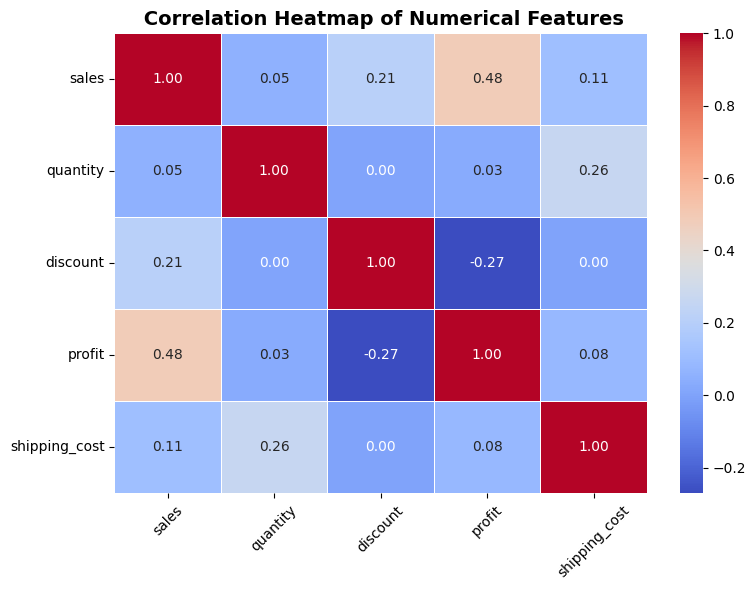

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = ['sales', 'quantity', 'discount', 'profit', 'shipping_cost']

# Compute correlation
corr_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title(" Correlation Heatmap of Numerical Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## Insights Insights from the Heatmap
Variable Pair  	    Correlation	       Interpretation
Sales vs Profit	     0.48	           Moderate positive relationship — as sales increase, profit often increases. But it’s not a strong correlation.
Discount vs Profit	 -0.27	       Negative correlation — higher discounts often reduce profit, as expected.
Quantity vs Shipping Cost	0.26	Weak positive — more quantity increases shipping cost a bit.
Sales vs Discount	   0.21	          Slight positive — possibly more discounts offered to boost sales.
Shipping Cost vs Profit	 0.08	    Nearly zero — shipping cost doesn't strongly influence profit directly.

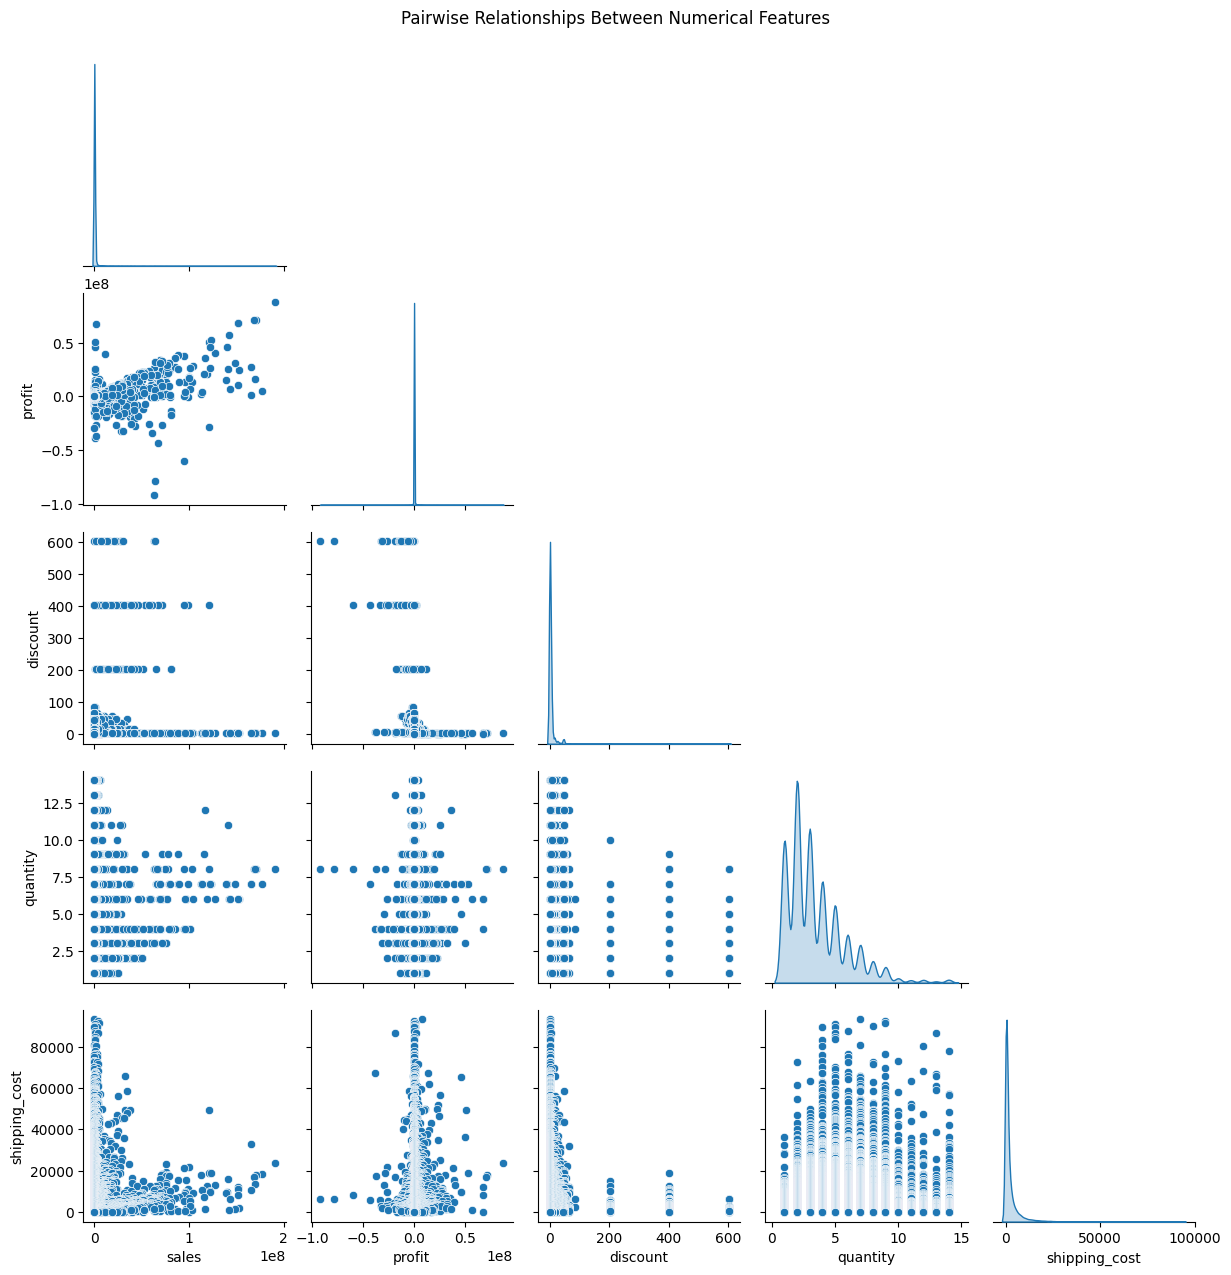

In [72]:
selected_cols = ['sales', 'profit', 'discount', 'quantity', 'shipping_cost']
sns.pairplot(df[selected_cols], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Relationships Between Numerical Features", y=1.02)
plt.show()


## Key Findings 
 +**Sales vs. Profit**
 There is a strong positive linear relationship — as sales increase, profits generally increase too.
 However, there are some points with high sales but negative or zero profit, likely due to:
High discounts,High shipping cost,Or unprofitable product lines.

 **Discount vs. Profit**
 Clear negative correlation — higher discounts often reduce profits.
You can see many points where profit drops even when discount increases.
 Business insight: Consider optimizing discount strategies to avoid margin loss.

 **Sales vs. Shipping Cost**
Slightly increasing trend: higher sales sometimes come with increased shipping cost, especially for bulk orders.
But there are many low-sale records with high shipping cost, which may be inefficient.
 Further filtering by shipping mode or category may explain it better.
 
**Quantity**
 Quantity mostly clusters at discrete levels (1–15), as expected for sales units.
You could consider boxplots by category or segment to explore where high quantities occur most.

**Outliers**
I  have visible outliers:

High sales or profit far from the rest (right-top corners),

High discount values that are unusual (even 600%?!),

High shipping_cost spikes.